# Procesi v analitiki podatkov

## Designing Machine Learning Workflows

### Feature engineering

In [ ]:
#REGRESIJA: napovemo številko
#KLASIFIKACIA: napovemo True/False (npr. a bi dali nekomu kredit glede na določene parametre ali ne); alli uvrstimo v
#kategorijo

In [11]:
import pandas as pd

In [12]:
#nekdo želi dobit posojilo na banki; iz parametrov bomo napovedali, ali bo kredit odobren ali ne
#to je primer klasifikacije
credit = pd.read_csv('data/credit.csv')

In [13]:
non_numeric_columns = ['checking_status',
                     'credit_history',
                     'purpose',
                     'savings_status',
                     'employment',
                     'personal_status',
                     'other_parties',
                     'property_magnitude',
                     'other_payment_plans',
                     'housing',
                     'job',
                     'own_telephone',
                     'foreign_worker']

In [14]:
credit.head()

checking_status  duration                    credit_history  \
0            '<0'         6  'critical/other existing credit'   
1      '0<=X<200'        48                   'existing paid'   
2   'no checking'        12  'critical/other existing credit'   
3            '<0'        42                   'existing paid'   
4            '<0'        24              'delayed previously'   

                   purpose  credit_amount      savings_status employment  \
0             buy_radio_tv           1169  'no known savings'      '>=7'   
1             buy_radio_tv           5951              '<100'   '1<=X<4'   
2                education           2096              '<100'   '4<=X<7'   
3  buy_furniture_equipment           7882              '<100'   '4<=X<7'   
4              buy_new_car           4870              '<100'   '1<=X<4'   

   installment_commitment       personal_status other_parties  ...  \
0                       4         'male single'          none  ...   
1                       2  'female div/dep/mar'          none  ...   
2                       2         'male single'          none  ...   
3                       2         'male single'     guarantor  ...   
4                       3         'male single'          none  ...   

    property_magnitude age  other_payment_plans     housing existing_credits  \
0        'real estate'  67                 none         own                2   
1        'real estate'  22                 none         own                1   
2        'real estate'  49                 none         own                1   
3     'life insurance'  45                 none  'for free'                1   
4  'no known property'  53                 none  'for free'                2   

                    job num_dependents  own_telephone foreign_worker class  
0               skilled              1            yes            yes  good  
1               skilled              1           none            yes   bad  
2  'unskilled resident'              2           none            yes  good  
3               skilled              2           none            yes  good  
4               skilled              2           none            yes   bad  

[5 rows x 21 columns]

In [15]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_status           1000 non-null object
duration                  1000 non-null int64
credit_history            1000 non-null object
purpose                   1000 non-null object
credit_amount             1000 non-null int64
savings_status            1000 non-null object
employment                1000 non-null object
installment_commitment    1000 non-null int64
personal_status           1000 non-null object
other_parties             1000 non-null object
residence_since           1000 non-null int64
property_magnitude        1000 non-null object
age                       1000 non-null int64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null int64
job                       1000 non-null object
num_dependents            1000 non-null int64
own_telephone             1000 non-null object
foreign_

In [ ]:
#ko delamo z machin learningom, moramo vse pretvorit v številske tipe
#lahko pa stringe pretvorimo v kategorije: vrednosti posortiramo v različne kategorije 
#npr. od te do te vrednosti je 7, več od tega je 8,...

In [16]:
from sklearn.preprocessing import LabelEncoder
#Encoder nam pretvori v cifre (kodira nam stolpce)
#pretvorimo samo nonnumeric stolpce

In [17]:
for column in non_numeric_columns:
    le = LabelEncoder()
    credit[column] = le.fit_transform(credit[column])

In [18]:
credit.head()
#ni več non numeric vrednosti

checking_status  duration  credit_history  purpose  credit_amount  \
0                1         6               1        4           1169   
1                0        48               3        4           5951   
2                3        12               1        6           2096   
3                1        42               3        2           7882   
4                1        24               2        3           4870   

   savings_status  employment  installment_commitment  personal_status  \
0               4           3                       4                3   
1               2           0                       2                0   
2               2           1                       2                3   
3               2           1                       2                3   
4               2           0                       3                3   

   other_parties  ...  property_magnitude  age  other_payment_plans  housing  \
0              2  ...                   2   67                    1        1   
1              2  ...                   2   22                    1        1   
2              2  ...                   2   49                    1        1   
3              1  ...                   0   45                    1        0   
4              2  ...                   1   53                    1        0   

   existing_credits  job  num_dependents  own_telephone  foreign_worker  class  
0                 2    3               1              1               1   good  
1                 1    3               1              0               1    bad  
2                 1    2               2              0               1   good  
3                 1    3               2              0               1   good  
4                 2    3               2              0               1    bad  

[5 rows x 21 columns]

In [11]:
credit.dtypes

checking_status            int64
duration                   int64
credit_history             int64
purpose                    int64
credit_amount              int64
savings_status             int64
employment                 int64
installment_commitment     int64
personal_status            int64
other_parties              int64
residence_since            int64
property_magnitude         int64
age                        int64
other_payment_plans        int64
housing                    int64
existing_credits           int64
job                        int64
num_dependents             int64
own_telephone              int64
foreign_worker             int64
class                     object
dtype: object

In [ ]:
#class je tipa object, ker to je stolpec, ki ga napovedujemo
#in ga ne kodiramo

In [19]:
#pretvori stolpce
def feature_engineering(data, non_numeric_columns=None):
    for column in non_numeric_columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        
    return data
    

In [20]:
credit = pd.read_csv('data/credit.csv')
credit = feature_engineering(credit, non_numeric_columns)

### Model selection

In [ ]:
#IZBIRA MODELA:
#ponavadi moramo probat
#pogledali bomo, kako se odločimo za model

#ponavadi so v modelih take oznake:
#X - feature-ji
#y - napovedujemo

In [21]:
#najprej razdelmo model na training del in test del
#to lahko ročno, lahko pa s funkcijo iz sklearn:
from sklearn.model_selection import train_test_split

In [22]:
#določimo X in y
X = credit.drop('class', 1)
y = credit['class']

In [23]:
#razdelimo na train in test del:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#test_size: koliko procentov hočemo, da je velik test del; 0.2 je 20%
#random_state 

In [24]:
X_test.shape

(200, 20)

In [25]:
y_test.shape

(200,)

In [26]:
X_train.shape

(800, 20)

In [27]:
y_train.shape

(800,)

In [28]:
#


from sklearn.ensemble import RandomForestClassifier

In [29]:
#init
rf_model = RandomForestClassifier(random_state=2, n_estimators=10)

#fit
rf_model.fit(X_train, y_train)

#predict
rf_prediction = rf_model.predict(X_test)

In [ ]:
#preverimo, kako natančen je model
# s funkcijo iz sklearn

In [30]:
#funkcija, ki nam vrne, kako je točen naš model
from sklearn.metrics import accuracy_score

In [31]:
#kot input mu podamo y_test in vrednosti, ki smo jih napovedali
accuracy= accuracy_score(y_test, rf_prediction)
print(accuracy)

0.74


In [32]:
#0.74: 74% je bil naš model točen

In [33]:
from sklearn.ensemble import AdaBoostClassifier

In [34]:
#inicializacija modela
ab_model = AdaBoostClassifier(random_state=2)

#fit
ab_model.fit(X_train, y_train)

#predict
ab_predict = ab_model.predict(X_test)

#testiranje natančnosti
accuracy1 = accuracy_score(y_test, ab_predict)
print(accuracy1)


0.75


You have just built your first pipeline. Did you wonder whether there are any additional parameters that you could tune to make AdaBoost even better? The answer is yes! Let's explore that in our next lesson on tuning parameters.

<img src="images/Screenshot from 2019-11-18 16-18-27.png">

### Grid search CV for model complexity

Define the parameter grid as described in the code comment and create a grid object with a RandomForestClassifier().

In [ ]:
#funkcija GridSearchCV poišče najboljši parameter za model
#npr.zadnjič pri regresiji smo sami spreminjali parametre in primerjali, kateri je najboljši
#to ta funkcija naredi za nas

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
# Set a range for n_estimators from 10 to 40 in steps of 10

#ime parametra, ki ga hočemo testirat?
param_grid = {'n_estimators': range(10, 50, 10)}

#parametri:
#1. kateri model uporabljamo
#2. param_grid - katere parametre hočemo, da testira (lahko kot dictionary, če jih je več)
#3. cross validation: cv = 3 pomeni, da razdeli na 3 dele
grid  = GridSearchCV(RandomForestClassifier(random_state=2), param_grid, cv = 3)

#podamo cel X in y notri, ni treba razdeliti na train del in test del
grid_model_result = grid.fit(X,y)



In [38]:
#rezultati
best_score = grid_model_result.best_score_
best_params = grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.751000 using {'n_estimators': 40}


In [39]:
#uporabimo n_estimators = 40 na našem modelu
rf_model = RandomForestClassifier( n_estimators=40)
rf_model.fit(X_train, y_train)
rf_prediction = rf_model.predict(X_test)
accuracy= accuracy_score(y_test, rf_prediction)
print(accuracy)


0.735


Adapt your code to optimise n_estimators for an AdaBoostClassifier().

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
# Define a grid for n_estimators ranging from 1 to 10
param_grid = {'n_estimators': range(1, 11)}

grid  = GridSearchCV(AdaBoostClassifier(random_state=2), param_grid, cv = 3)
grid_model_result = grid.fit(X,y)
best_score = grid_model_result.best_score_
best_params = grid_model_result.best_params_


print("Best: %f using %s" % (best_score, best_params))

Best: 0.736000 using {'n_estimators': 10}


Adapt your code to optimise n_neighbors for an KNeighborsClassifier().

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
# Define a grid for n_neighbors with values 10, 50 and 100
param_grid = {'n_neighbors': [10, 50, 100]}

grid  = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 3)
grid_model_result = grid.fit(X,y)
best_score = grid_model_result.best_score_
best_params = grid_model_result.best_params_

print("Best: %f using %s" % (best_score, best_params))

Best: 0.704000 using {'n_neighbors': 50}


### Categorical encodings

In [44]:
credit = pd.read_csv('data/credit.csv')

non_numeric_columns = ['checking_status',
                     'purpose',
                     'savings_status',
                     'employment',
                     'personal_status',
                     'other_parties',
                     'property_magnitude',
                     'other_payment_plans',
                     'housing',
                     'job',
                     'own_telephone',
                     'foreign_worker']

credit = feature_engineering(credit, non_numeric_columns)

X = credit.drop(['class', 'credit_history'], 1)

In [45]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_status           1000 non-null int64
duration                  1000 non-null int64
credit_history            1000 non-null object
purpose                   1000 non-null int64
credit_amount             1000 non-null int64
savings_status            1000 non-null int64
employment                1000 non-null int64
installment_commitment    1000 non-null int64
personal_status           1000 non-null int64
other_parties             1000 non-null int64
residence_since           1000 non-null int64
property_magnitude        1000 non-null int64
age                       1000 non-null int64
other_payment_plans       1000 non-null int64
housing                   1000 non-null int64
existing_credits          1000 non-null int64
job                       1000 non-null int64
num_dependents            1000 non-null int64
own_telephone             1000 non-null int64
foreign_worker     

In [ ]:
#credit_history nismo zakodirali
#zakodirali ga bomo na dva načina

In [46]:
#1. NAČIN
le = LabelEncoder()
credit_history_num = le.fit_transform(credit['credit_history'])

In [47]:
#credit_history_num dodamo našemu datasetu
X_num = pd.concat([X, pd.Series(credit_history_num)], axis =1)

In [48]:
X_num.head()

#credit_history_num je na koncu, z oznako stolpca 0

checking_status  duration  purpose  credit_amount  savings_status  \
0                1         6        4           1169               4   
1                0        48        4           5951               2   
2                3        12        6           2096               2   
3                1        42        2           7882               2   
4                1        24        3           4870               2   

   employment  installment_commitment  personal_status  other_parties  \
0           3                       4                3              2   
1           0                       2                0              2   
2           1                       2                3              2   
3           1                       2                3              1   
4           0                       3                3              2   

   residence_since  property_magnitude  age  other_payment_plans  housing  \
0                4                   2   67                    1        1   
1                2                   2   22                    1        1   
2                3                   2   49                    1        1   
3                4                   0   45                    1        0   
4                4                   1   53                    1        0   

   existing_credits  job  num_dependents  own_telephone  foreign_worker  0  
0                 2    3               1              1               1  1  
1                 1    3               1              0               1  3  
2                 1    2               2              0               1  1  
3                 1    3               2              0               1  3  
4                 2    3               2              0               1  2

In [49]:
#2. NAČIN
#dummies encoding
X_hot = pd.concat([X, pd.get_dummies(credit['credit_history'])], axis =1)

In [50]:
X_hot.head()

#vidimo, da so na koncu nove kategorije

checking_status  duration  purpose  credit_amount  savings_status  \
0                1         6        4           1169               4   
1                0        48        4           5951               2   
2                3        12        6           2096               2   
3                1        42        2           7882               2   
4                1        24        3           4870               2   

   employment  installment_commitment  personal_status  other_parties  \
0           3                       4                3              2   
1           0                       2                0              2   
2           1                       2                3              2   
3           1                       2                3              1   
4           0                       3                3              2   

   residence_since  ...  existing_credits  job  num_dependents  own_telephone  \
0                4  ...                 2    3               1              1   
1                2  ...                 1    3               1              0   
2                3  ...                 1    2               2              0   
3                4  ...                 1    3               2              0   
4                4  ...                 2    3               2              0   

   foreign_worker  'all paid'  'critical/other existing credit'  \
0               1           0                                 1   
1               1           0                                 0   
2               1           0                                 1   
3               1           0                                 0   
4               1           0                                 0   

   'delayed previously'  'existing paid'  'no credits/all paid'  
0                     0                0                      0  
1                     0                1                      0  
2                     0                0                      0  
3                     0                1                      0  
4                     1                0                      0  

[5 rows x 24 columns]

In [80]:
X_hot.shape

(1000, 24)

In [81]:
X_num.shape

(1000, 20)

In [ ]:
#uporabimo oba, X_num in X_hotin pogledamo, kateri je boljši:

In [51]:
#X_hot
X_hot_train, X_hot_test, y_train, y_test = train_test_split(X_hot, y, test_size = 0.2, random_state=1)

In [52]:
#X_num
X_num_train, X_num_test, y_train, y_test = train_test_split(X_num, y, test_size = 0.2, random_state=1)

In [53]:
#X_num
rf_model = RandomForestClassifier( n_estimators=40)
rf_model.fit(X_num_train, y_train)
rf_prediction = rf_model.predict(X_num_test)
accuracy= accuracy_score(y_test, rf_prediction)
print(accuracy)


0.765


In [54]:
#X_hot
rf_model = RandomForestClassifier( n_estimators=40)
rf_model.fit(X_hot_train, y_train)
rf_prediction = rf_model.predict(X_hot_test)
accuracy= accuracy_score(y_test, rf_prediction)
print(accuracy)


0.77


### Feature transformations

In [ ]:
#credit_amounts bomo uporabili na dva načina:
#1. vrednost kot taka (normalen feature)
#2. absolutna vrednost?

In [55]:
#modul, ki izbere najboljše feature-je
from sklearn.feature_selection import chi2, SelectKBest

In [56]:
import numpy as np

In [57]:
def abs_diff(x):
    return np.abs(x-np.mean(x))

In [58]:
credit['diff'] = abs_diff(credit['credit_amount'])



In [59]:
sk = SelectKBest(chi2, k=1)

In [60]:
sk.fit(credit[['credit_amount', 'diff']], credit['class'])

SelectKBest(k=1, score_func=<function chi2 at 0x7ffb8bcd7b70>)

In [64]:
selected = sk.get_support()

In [62]:
X_selected = credit[['credit_amount', 'diff']]

In [63]:
X_selected.columns[selected]

Index(['credit_amount'], dtype='object')

### Bringing it all together

In [65]:
#nastavimo, da ne izpisuje warningov
import warnings
warnings.filterwarnings('ignore')

In [74]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [70]:
#podatki o delovanju srca
#na podlagi teh podatkov bomo iskali, ali ima človek aritimijo ali ne
arrh = pd.read_csv('data/arrh.csv')

In [71]:
 arrh.info()
    
#ne rabimo nobenih tipov pretvarjat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to class
dtypes: float64(120), int64(160)
memory usage: 988.8 KB


In [72]:
arrh.head()

age  sex  height  weight  QRSduration  PRinterval  Q-Tinterval  Tinterval  \
0   75    0     190      80           91         193          371        174   
1   56    1     165      64           81         174          401        149   
2   54    0     172      95          138         163          386        185   
3   55    0     175      94          100         202          380        179   
4   75    0     190      80           88         181          360        177   

   Pinterval  QRS  ...  chV6_QwaveAmp  chV6_RwaveAmp  chV6_SwaveAmp  \
0        121  -16  ...            0.0            9.0           -0.9   
1         39   25  ...            0.0            8.5            0.0   
2        102   96  ...            0.0            9.5           -2.4   
3        143   28  ...            0.0           12.2           -2.2   
4        103  -16  ...            0.0           13.1           -3.6   

   chV6_RPwaveAmp  chV6_SPwaveAmp  chV6_PwaveAmp  chV6_TwaveAmp  chV6_QRSA  \
0             0.0             0.0            0.9            2.9       23.3   
1             0.0             0.0            0.2            2.1       20.4   
2             0.0             0.0            0.3            3.4       12.3   
3             0.0             0.0            0.4            2.6       34.6   
4             0.0             0.0           -0.1            3.9       25.4   

   chV6_QRSTA  class  
0        49.4      0  
1        38.8      0  
2        49.0      0  
3        61.6      1  
4        62.8      0  

[5 rows x 280 columns]

In [73]:
#zbrišemo stolpec, ki ga napovedujemo
X = arrh.drop('class', 1)

In [75]:
#skaliramo vse vrednosti med 0 in 1
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

In [76]:
X = rescaledX
y = arrh['class']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,  random_state=1)

In [84]:
grid_search = GridSearchCV(rfc(random_state=1), param_grid={'max_depth': [2,5,10]})

In [85]:
best_value = grid_search.fit(X_train, y_train).best_params_['max_depth']

In [86]:
best_value

10

In [88]:
#naredimo model, uporabimo best value
clf = rfc(random_state=1, max_depth=best_value).fit(X_train, y_train)

In [89]:

vt = SelectKBest(chi2, k=100).fit(X_train, y_train)

In [92]:
#vzame tistih 100, ki so bili True
X_train_reduced = vt.transform(X_train)
X_test_reduced = vt.transform(X_test)

In [93]:
clf = rfc(random_state=1, max_depth=best_value).fit(X_train_reduced, y_train)

In [94]:
prediction = clf.predict(X_test_reduced)

In [95]:
accuracy_score(y_test, prediction)*100

79.64601769911505

PONOVITEV ANALIZE IN GRAFOV:

## Exploring the Bitcoin Cryptocurrency Market

### Bitcoin. Cryptocurrencies.

In [147]:
# Importing pandas
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

#current = pd.read_json("https://api.coinmarketcap.com/v1/ticker/")


#current.head()

### Full dataset, filtering, and reproducibility

In [148]:
#podatki o bitcoinih
dec6 = pd.read_csv('data/coinmarketcap_06122017.csv')

dec6.head()

Unnamed: 0  24h_volume_usd  available_supply            id  last_updated  \
0           0    9.007640e+09      1.672352e+07       bitcoin    1512549554   
1           1    1.551330e+09      9.616537e+07      ethereum    1512549553   
2           2    1.111350e+09      1.684044e+07  bitcoin-cash    1512549578   
3           3    2.936090e+09      2.779530e+09          iota    1512549571   
4           4    2.315050e+08      3.873915e+10        ripple    1512549541   

   market_cap_usd    max_supply          name  percent_change_1h  \
0    2.130493e+11  2.100000e+07       Bitcoin               0.12   
1    4.352945e+10           NaN      Ethereum              -0.18   
2    2.529585e+10  2.100000e+07  Bitcoin Cash               1.65   
3    1.475225e+10  2.779530e+09          IOTA              -2.38   
4    9.365343e+09  1.000000e+11        Ripple               0.56   

   percent_change_24h  percent_change_7d  price_btc     price_usd  rank  \
0                7.33              17.45   1.000000  12739.500000     1   
1               -3.93              -7.33   0.036177    452.652000     2   
2               -5.51              -4.75   0.120050   1502.090000     3   
3               83.35             255.82   0.000424      5.307460     4   
4               -3.70             -14.79   0.000019      0.241754     5   

  symbol  total_supply  
0    BTC  1.672352e+07  
1    ETH  9.616537e+07  
2    BCH  1.684044e+07  
3  MIOTA  2.779530e+09  
4    XRP  9.999309e+10

In [149]:
dec6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 16 columns):
Unnamed: 0            1326 non-null int64
24h_volume_usd        1270 non-null float64
available_supply      1031 non-null float64
id                    1326 non-null object
last_updated          1326 non-null int64
market_cap_usd        1031 non-null float64
max_supply            215 non-null float64
name                  1326 non-null object
percent_change_1h     1273 non-null float64
percent_change_24h    1270 non-null float64
percent_change_7d     1283 non-null float64
price_btc             1326 non-null float64
price_usd             1326 non-null float64
rank                  1326 non-null int64
symbol                1326 non-null object
total_supply          1211 non-null float64
dtypes: float64(10), int64(3), object(3)
memory usage: 165.8+ KB


In [150]:
#koliko so vsi bit coini vredni  skuapj
market_cap_raw = dec6[['id', 'market_cap_usd']]


market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

In [ ]:
#iz tega vidimo, da ima market_cap_usd manjkajoče vrednosti
#odstranimo te manjkajoče vrednosti

In [151]:
market_cap_raw.head()

id  market_cap_usd
0       bitcoin    2.130493e+11
1      ethereum    4.352945e+10
2  bitcoin-cash    2.529585e+10
3          iota    1.475225e+10
4        ripple    9.365343e+09

In [152]:
market_cap_raw.tail()

id  market_cap_usd
1321          turbocoin             NaN
1322              birds             NaN
1323  bitcoincashscrypt             NaN
1324          swisscoin             NaN
1325          faceblock             NaN

### Discard the cryptocurrencies without a market capitalization

In [153]:
#odstranimo manjkajoče vrednosti
cap = market_cap_raw.dropna()

In [154]:
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

### How big is Bitcoin compared with the rest of the cryptocurrencies?

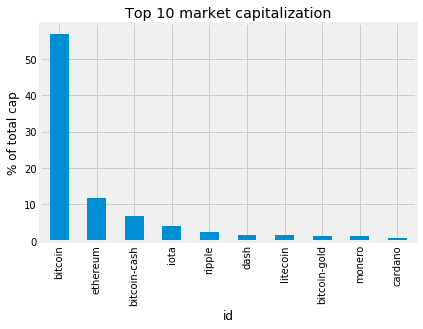

In [157]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

cap10 = cap.head(10).copy()
cap10 = cap10.set_index('id', drop=False)

#assign je podobno kot apply: vsaki vrstici bo assignal to vrednost, ki jo bomo izračuali
cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd / cap.market_cap_usd.sum()* 100))

ax = cap10.plot.bar(x='id', y = 'market_cap_perc', title = TOP_CAP_TITLE, legend = False)
ax.set_ylabel(TOP_CAP_YLABEL)
plt.show()

### Making the plot easier to read and more informative

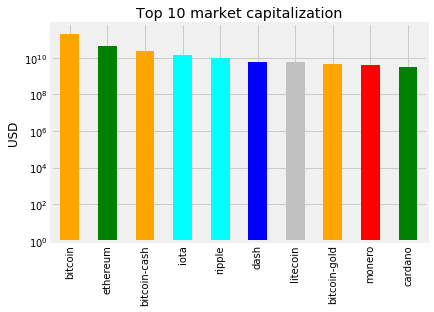

In [160]:
#lahko naredimo lepši graf

# Colors for the bar plot
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']


#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'




ax = cap10.plot.bar(x='id', 
                    y = 'market_cap_usd', 
                    title = TOP_CAP_TITLE, 
                    colors = COLORS,
                    log =True,
                    legend = False)
                   


ax.set_ylabel('USD')

ax.set_xlabel('')
plt.show()

### What is going on?! Volatility in cryptocurrencies

In [161]:
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = dec6[['id', 'percent_change_24h', 'percent_change_7d']].copy()

volatility=volatility.set_index('id')
volatility.dropna(inplace=True)

#sortiramo po spremembah
volatility = volatility.sort_values('percent_change_24h', ascending=True)

volatility.head()

percent_change_24h  percent_change_7d
id                                                  
flappycoin                 -95.85             -96.61
credence-coin              -94.22             -95.31
coupecoin                  -93.93             -61.24
tyrocoin                   -79.02             -87.43
petrodollar                -76.55             542.96

In [162]:
volatility.tail()

percent_change_24h  percent_change_7d
id                                               
eaglecoin               272.50             114.73
beatcoin                295.49             132.79
bitzeny                 416.04            3360.71
cashcoin                457.86             374.30
fedoracoin              833.01              92.10

### Well, we can already see that things are a bit crazy

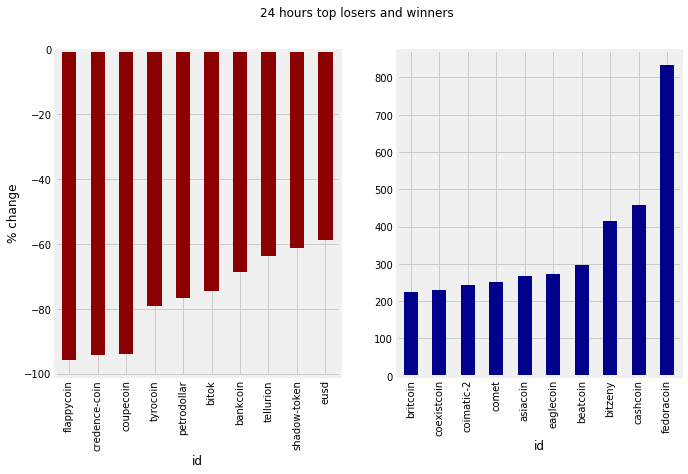

In [165]:
#zrišemo prvih 10 in zadnjih 10
def top10_subplot(volatility_series, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    
    ax = (volatility_series[:10].plot.bar(color='darkred', ax=axes[0]))

    fig.suptitle(title)

    ax.set_ylabel('% change')

    ax = (volatility_series[-10:].plot.bar(color='darkblue', ax=axes[1]))
    

    return fig, ax

DTITLE = "24 hours top losers and winners"
 
fig, ax = top10_subplot(volatility['percent_change_24h'], DTITLE)
plt.show()

### Ok, those are... interesting. Let's check the weekly Series too.

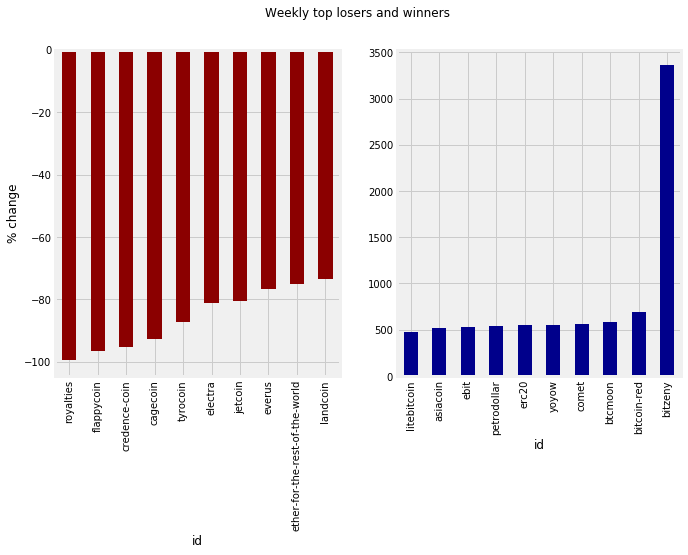

In [168]:
# Sorting in ascending order
volatility7d =  volatility.sort_values('percent_change_7d', ascending=True)

WTITLE = "Weekly top losers and winners"


fig, ax = top10_subplot(volatility7d['percent_change_7d'], WTITLE)
plt.show()

### How small is small?

In [170]:
##valute, ki imajo kapitalizacijo več od 10 miljard
largecaps =  cap.query('market_cap_usd > 10_000_000_000')
largecaps.head()

id  market_cap_usd
0       bitcoin    2.130493e+11
1      ethereum    4.352945e+10
2  bitcoin-cash    2.529585e+10
3          iota    1.475225e+10

### Most coins are tiny

These are the market cap definitions from Investopedia:
- Large cap: +10 billion
- Mid cap: 2 billion - 10 billion
- Small cap: 300 million - 2 billion
- Micro cap: 50 million - 300 million
- Nano cap: Below 50 million

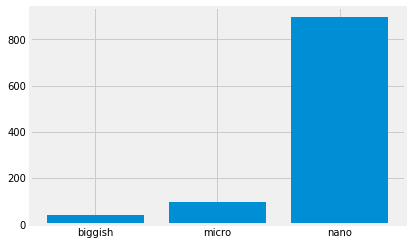

In [171]:
# Making a nice function for counting different marketcaps from the
# "cap" DataFrame. Returns an int.
# INSTRUCTORS NOTE: Since you made it to the end, consider it a gift :D
def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ["biggish", "micro", "nano"]

# Using capcount count the biggish cryptos
biggish = capcount('market_cap_usd>300000000')

# Same as above for micro ...
micro = capcount('market_cap_usd>50000000 & market_cap_usd<300000000')

# ... and for nano
nano =  capcount('market_cap_usd<50000000')

# Making a list with the 3 counts
values = [biggish,micro, nano]

# Plotting them with matplotlib 
# ... YOUR CODE FOR TASK 10 ...
plt.bar(range(len(values)), values, tick_label=LABELS)
plt.show()

## Predicting Credit Card Approvals

### Credit card applications

In [111]:
#preverili bomo, ali si uporabnik banke zasluži kreditno kartico ali ne

import pandas as pd

# Load dataset
cc_apps = pd.read_csv('data/cc_approvals.data', header=None)


cc_apps.head()

#stolpec 15: ali je odobrena kreditna kartica ali ne

0      1      2  3  4  5  6     7  8  9   10 11 12     13   14 15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  00202    0  +
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  f  g  00043  560  +
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  f  g  00280  824  +
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  t  g  00100    3  +
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  f  s  00120    0  +

### Inspecting the applications

In [97]:
cc_apps.describe()



2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000

In [98]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


### Handling the missing values (part i)

In [ ]:
#ali imamo manjkajoče vrednosti?
#izgleda kot da ne, v resnici pa so manjkajoče vrednosti označene z ?

#string pretvorimo v numerične vrednpsti
#znebit/spremenit moramo manjkajoče vrednosti

In [112]:
#kje so manjkajoče vrednosti:
cc_apps.loc[cc_apps[13].isin(['?'])]

0      1       2  3  4   5   6       7  8  9   10 11 12 13     14 15
71   b  34.83   4.000  u  g   d  bb  12.500  t  f   0  t  g  ?      0  -
202  b  24.83   2.750  u  g   c   v   2.250  t  t   6  f  g  ?    600  +
206  a  71.58   0.000  ?  ?   ?   ?   0.000  f  f   0  f  p  ?      0  +
243  a  18.75   7.500  u  g   q   v   2.710  t  t   5  f  g  ?  26726  +
270  b  37.58   0.000  ?  ?   ?   ?   0.000  f  f   0  f  p  ?      0  +
278  b  24.58  13.500  y  p  ff  ff   0.000  f  f   0  f  g  ?      0  -
330  b  20.42   0.000  ?  ?   ?   ?   0.000  f  f   0  f  p  ?      0  -
406  a  40.33   8.125  y  p   k   v   0.165  f  t   2  f  g  ?     18  -
445  a      ?  11.250  u  g  ff  ff   0.000  f  f   0  f  g  ?   5200  -
456  b  34.58   0.000  ?  ?   ?   ?   0.000  f  f   0  f  p  ?      0  -
592  b  23.17   0.000  ?  ?   ?   ?   0.000  f  f   0  f  p  ?      0  +
622  a  25.58   0.000  ?  ?   ?   ?   0.000  f  f   0  f  p  ?      0  +
626  b  22.00   7.835  y  p   i  bb   0.165  f  f   0  t  g  ?      0  -

In [113]:
#vse ? pretvorimo v nan, da bo pandas zaznal, da gre za manjkajoče vrednosti
cc_apps = cc_apps.replace('?', np.nan)

In [114]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     678 non-null object
1     678 non-null object
2     690 non-null float64
3     684 non-null object
4     684 non-null object
5     681 non-null object
6     681 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    677 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [115]:
#stolpec 1 pretvorimo tip
cc_apps[1] = cc_apps[1].astype('float')

In [116]:
#število manjkajočih vrednosti v vsakem stolpcu
cc_apps.isnull().sum()

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

In [ ]:
#ločeno rešujemo manjkajoče vrednosti pri stringih in pri številkah

### Handling the missing values (part ii)

In [ ]:
#manjkajoče vrednosti pri številkah
#zapolnimo manjkajoče vrednosti s povprečno vrednostjo ostalih


In [117]:
cc_apps.fillna(cc_apps.mean(), inplace = True)

In [118]:
cc_apps.isnull().sum()

#rešili smo stolpec 1 (ki je edini številksi z missing values)

0     12
1      0
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

### Handling the missing values (part iii)

In [ ]:
#manjkajpče vrednosti v object stolpcih
#zapolnimo jih z najbolj pogosto vrednostjo

In [121]:
#najbolj pogosta vrednost: value_counts().index[0]
for col in cc_apps:
    if cc_apps[col].dtypes == 'object':  #samo za object stolpce
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])
        

In [119]:
cc_apps[4].value_counts().index[0]

'g'

In [122]:
cc_apps.isnull().sum()

#nimamo več manjkajočuh vrednosti

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

### Preprocessing the data (part i)

In [123]:
#object vrednosti pretvorimo v število

from sklearn.preprocessing import LabelEncoder

In [124]:
#inicializacija
le = LabelEncoder()

In [128]:
#izberemo samo stolpce tipa object in jih transformamo
for col in cc_apps:
    if cc_apps[col].dtypes == 'object': 
        cc_apps[col] = le.fit_transform(cc_apps[col])

In [129]:
cc_apps.head()

#imamo samo numerične vrednosti

0      1      2   3   4   5   6     7   8   9   10  11  12  13   14  15
0   1  30.83  0.000   2   1  13   8  1.25   1   1   1   0   0  68    0   0
1   0  58.67  4.460   2   1  11   4  3.04   1   1   6   0   0  11  560   0
2   0  24.50  0.500   2   1  11   4  1.50   1   0   0   0   0  96  824   0
3   1  27.83  1.540   2   1  13   8  3.75   1   1   5   1   0  31    3   0
4   1  20.17  5.625   2   1  13   8  1.71   1   0   0   0   2  37    0   0

### Splitting the dataset into train and test sets

In [130]:
#razdelimo podatke na dva dela

#ŠE PREJ
#stolpec 11: ali ima oseba vozniško dovoljenje
#stolpec 13: poštna številka
# te dva stolpca nista relevantan za naš model, zato jih odstranimo

In [131]:
from sklearn.model_selection import train_test_split


#odstranimo stolpca 11 in 13
cc_apps.drop([11, 13], axis = 1)
cc_apps = cc_apps.values #.values_ iz dataframe naredi numpy array, raje to damo v model, ker je hitreje

In [132]:
#razdelimo podatke
X = cc_apps[:, 0:13]
y = cc_apps[:, 13]

In [133]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

### Preprocessing the data (part ii)

In [134]:
#normaliziramo podatke

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)


### Fitting a logistic regression model to the train set

In [142]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(rescaledX_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Making predictions and evaluating performance

In [139]:
y_pred = logreg.predict(rescaledX_test)
logreg.score(rescaledX_test, y_test)

0.16228070175438597

In [140]:
accuracy_score(y_test, y_pred)

#isto je kot tisto zgoraj

0.16228070175438597

In [143]:
#prediktamo vrednosti

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


#92 in 100 (po diagonali) so pravilno napovedane vrednosti
#25 in 11 so napačne vrednosti

#tale matrika ni ok

array([[36,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       ...,
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0]])

<img src="images/Screenshot from 2019-11-18 09-19-24.png">

### Grid searching and making the model perform better

In [144]:
#probamo dobiti najboljše parametre za naš model

from sklearn.model_selection import GridSearchCV


tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

param_grid = dict(tol =tol, max_iter = max_iter)
param_grid

{'tol': [0.01, 0.001, 0.0001], 'max_iter': [100, 150, 200]}

### Finding the best performing model

In [145]:
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)


rescaledX = scaler.fit_transform(X)
grid_model_result = grid_model.fit(rescaledX, y)



In [146]:
best_score = grid_model_result.best_score_
best_params = grid_model_result.best_params_

print("Best: %f using %s" % (best_score, best_params))

Best: 0.188406 using {'max_iter': 100, 'tol': 0.01}
